### Analiza opadów deszczu w Indiach, w latach 1901-2016

Użyty plik: https://climateknowledgeportal.worldbank.org/api/data/get-download-data/historical/pr/1901-2016/IND/India   
Dane z databank.worldbank.org

In [159]:
from matplotlib import pyplot as plt
dane = {}

with open("INDIA.csv") as plik:                                                # Otwórz dokument INDIA.csv
    for wiersz in plik.readlines():                                             # Przeczytaj każdą linię

        opady_string, lata_string, miesiace_string = wiersz.split(",")          # Rozdziel linie na stringi
        
        opady = float(opady_string)                                             # Konwertuj stringi na typy danych
        lata = int(lata_string)
        miesiace = miesiace_string.strip().lower()
        
        dane[lata] = dane.get(lata, {})                                         # Utwórz dla każdego roku zestaw miesięcy 
        dane[lata][miesiace] = opady

### Najbardziej suchy i najbardziej mokry miesiąc w Indiach na przestrzeni 1901-2016


In [160]:
najlepszy_rok = najgorszy_rok = 0                                               # Predefiniuj zmienne
najlepszy__miesiac = najgorszy_miesiac = 0
najwyzsze_opady = najnizsze_opady = 0

for rok in dane:                                                                # Szukaj roku

    miesiace = dane[rok].values()
    opady = {v: k for k, v in dane[rok].items()}
    
    max_miesiac = max(miesiace)                                                 # Znajdź najbardziej ulewny i suchy miesiąc
    min_miesiac = min(miesiace)
    
    if najwyzsze_opady < max_miesiac:                                           # Jeśli najwyższe opady są mniejsze od 
        najlepszy_rok = rok                                                     # najbardziej ulewnego miesiąca to to jest 
        najwyzsze_opady = max_miesiac                                           # nasz szukany najbardziej ulewny rok i miesiąc
        najlepszy__miesiac = opady[najwyzsze_opady]

    if najnizsze_opady < min_miesiac:                                           # Jeśli najniższe opady są mniejsze od
        najgorszy_rok = rok                                                     # najmniej ulewnego miesiąca to to jest
        najnizsze_opady = min_miesiac                                           # nasz szukany najbardziej suchy rok i miesiąc
        najgorszy_miesiac = opady[najnizsze_opady]

Wypisz w jakim roku oraz miesiącu wystąpiły największe i najmniejsze opady


In [162]:
print("Najniższe średnie opady:\n")                                             # Wypisz najniższe opady, rok i miesiąc
print(f"wystąpiły:{najgorszy_rok} rok w {najgorszy_miesiac}")
print(f"wyniosły: {najnizsze_opady}mm/m2\n")

print(f"Najwyższe średnie opady:\n")                                            # Wypisz najwyższe opady, rok i miesiąc
print(f"wystąpiły: {najlepszy_rok} rok w {najlepszy__miesiac}")
print(f"wyniosły: {najwyzsze_opady}mm/m2\n")

Najniższe średnie opady:

wystąpiły:1995 rok w luty
wyniosły: 16.8758mm/m2

Najwyższe średnie opady:

wystąpiły: 1942 rok w lipiec
wyniosły: 330.852mm/m2



### 1. Prezentacja najbardziej suchego i najbardziej ulewnego roku

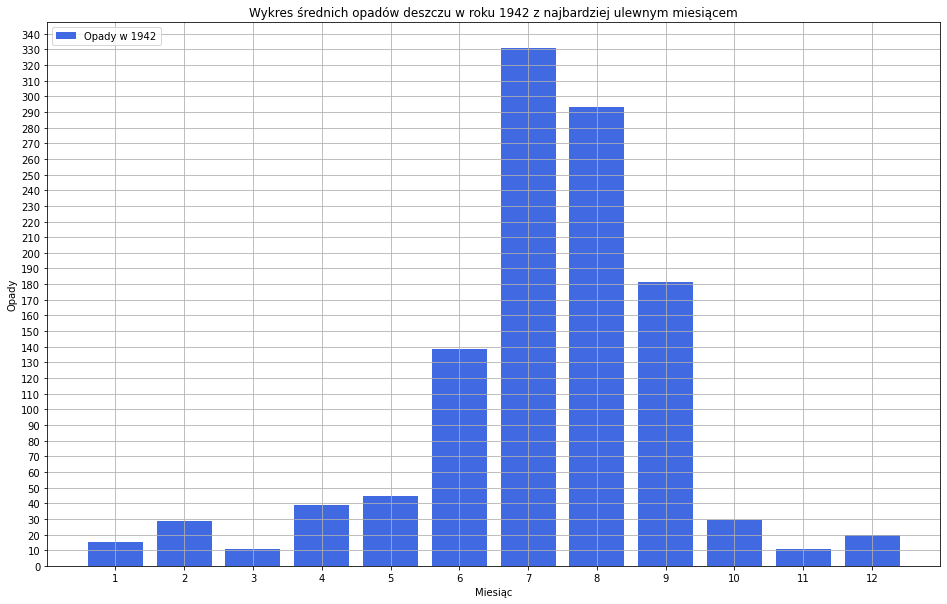

In [163]:
%matplotlib inline                                                               
plt.rcParams["figure.figsize"] = (16.0, 10.0)                                    #Zacznij tworzyć wykres, Określ wymiary wykresu

osX = range(1, len(dane[najlepszy_rok].keys())+1)                                # oś X
osY = list(dane[najlepszy_rok].values())                                         # oś Y

plt.grid()                                                                       # Utwórz siatkę, nazwij osie, nadaj tytuł
plt.xlabel("Miesiąc")
plt.ylabel("Opady")
plt.title(f"Wykres średnich opadów deszczu w roku {najlepszy_rok} z najbardziej ulewnym miesiącem")
plt.yticks(range(0, 350, 10))                                                    # Określ krok na osi X i Y
plt.xticks(range(0, 13, 1))
plt.bar(osX, osY, label=f"Opady w {najlepszy_rok}",color=['royalblue'])          # Stwórz wykres       
plt.legend(loc="upper left")                                                     # Utwórz Legendę 

plt.show()                                                                       # Pokaż wykres

#### Najbardziej suchy miesiąc:

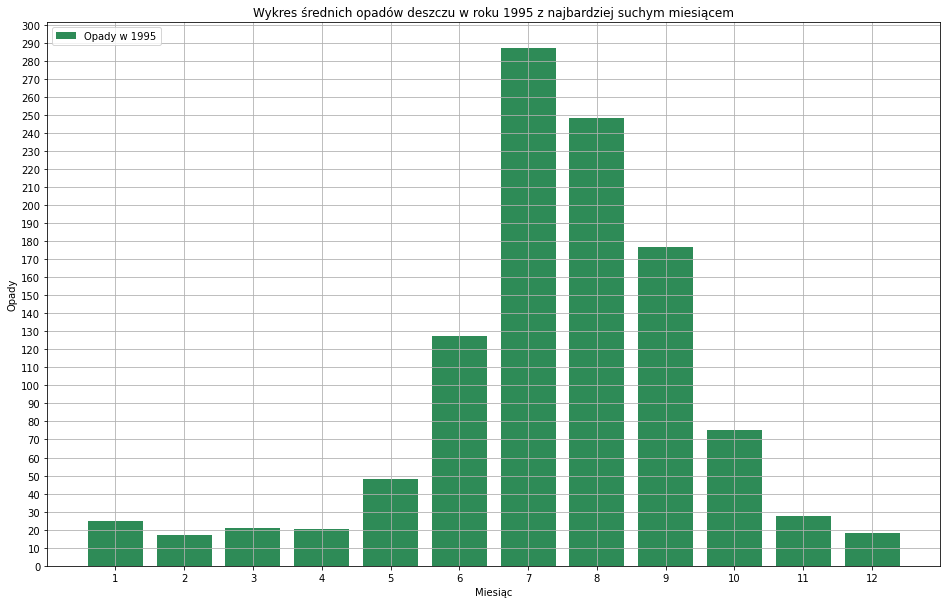

In [164]:
osX = range(1, len(dane[najgorszy_rok].keys())+1)                                # oś X
osY = list(dane[najgorszy_rok].values())                                         # oś Y

plt.grid()                                                                       # Utwórz siatkę, nazwij osie, nadaj tytuł
plt.xlabel("Miesiąc")
plt.ylabel("Opady")
plt.title(f"Wykres średnich opadów deszczu w roku {najgorszy_rok} z najbardziej suchym miesiącem")
plt.yticks(range(0, 350, 10))                                                    # Określ krok na osi X i Y
plt.xticks(range(0, 13, 1))
plt.bar(osX, osY, label=f"Opady w {najgorszy_rok}", color=['seagreen'])          # Stwórz wykres 
plt.legend(loc="upper left")                                                     # Utwórz Legendę 


plt.show()                                                                       # Pokaż wykres

### 2. Prównanie uśrednionego najbradziej suchego roku z najbardziej ulewnym


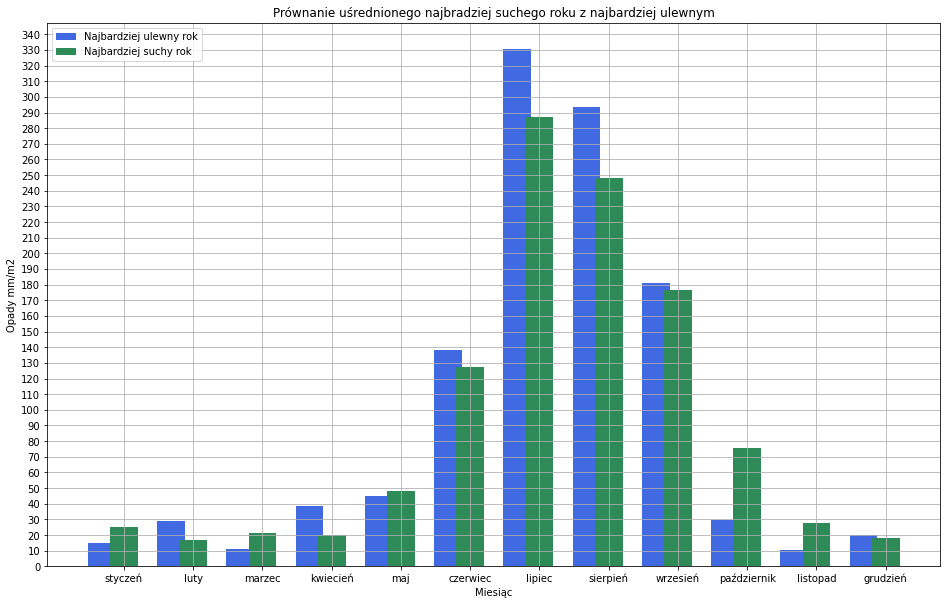

In [165]:
Najbardziej_ulewny = list(dane[najlepszy_rok].values())                                  # Określ najbardziej ulewny rok 
Najbardziej_suchy = list(dane[najgorszy_rok].values())                                   # Określ najbardziej suchy rok
wartosci = range(len(Najbardziej_ulewny))                                         


plt.bar([h-0.16 for h in wartosci], Najbardziej_ulewny, width=0.40,color=['royalblue'])  # Utwórz 2 wykresy    
plt.bar([h+0.16 for h in wartosci], Najbardziej_suchy, width=0.40, color=['seagreen'],
     tick_label=["styczeń", "luty", "marzec", "kwiecień", "maj","czerwiec","lipiec","sierpień","wrzesień","październik","listopad","grudzień"])
  
plt.grid()                                                                               # Stwórz siatkę,tytuł, labelki         
plt.title("Prównanie uśrednionego najbradziej suchego roku z najbardziej ulewnym")       
plt.xlabel("Miesiąc")
plt.ylabel("Opady mm/m2")
plt.yticks(range(0, 350, 10))                                                            # Określ krok na osi Y, Stwórz legendę
plt.legend(["Najbardziej ulewny rok", "Najbardziej suchy rok"], loc="upper left")
plt.show()                                                                               # Pokaż wykres

### 3. Ukazanie tendencji opadów deszczu na przestrzeni lat dla 3 najbardziej ulewnych miesięcy


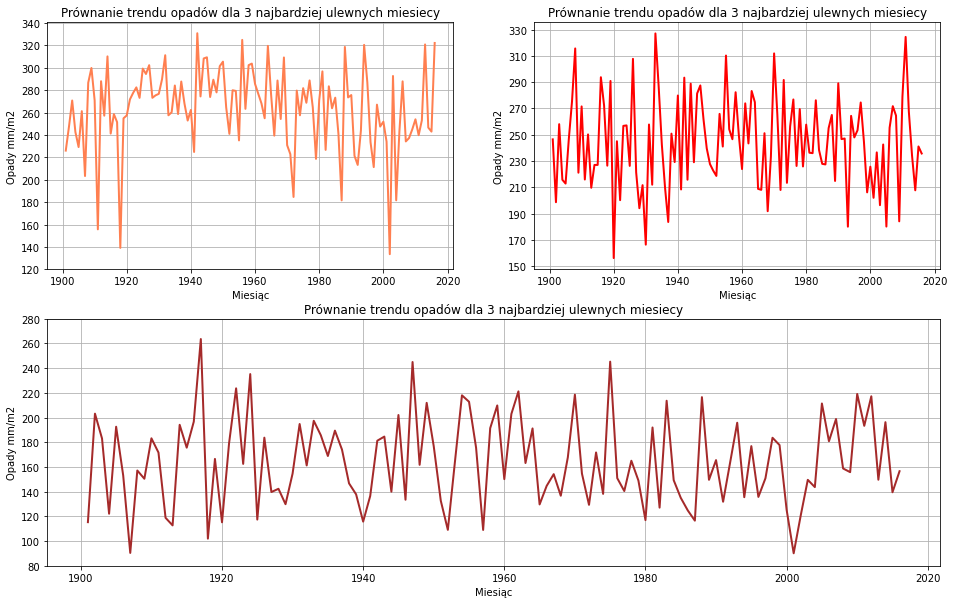

In [166]:
osX = list(dane.keys())
lipiec = [dane[y]["lipiec"] for y in dane.keys()]                                      # Wypisz 3 najbardziej ulewne miesiące
sierpien = [dane[y]["sierpień"] for y in dane.keys()]
wrzesien = [dane[y]["wrzesień"] for y in dane.keys()]


plt.subplot(2, 2, 1)                                                                   # Utwórz wykres 1 
plt.plot(osX, lipiec, label="Lipiec", linewidth=2, color = "coral")

plt.grid()
plt.title("Prównanie trendu opadów dla 3 najbardziej ulewnych miesiecy")
plt.xlabel("Miesiąc")
plt.ylabel("Opady mm/m2")
plt.yticks(range(120, 350, 20))

plt.subplot(2, 2, 2)                                                                   # Utwórz wykres 2 
plt.plot(osX, sierpien, label="Sierpien", linewidth=2, color = "red")

plt.grid()
plt.title("Prównanie trendu opadów dla 3 najbardziej ulewnych miesiecy")
plt.xlabel("Miesiąc")
plt.ylabel("Opady mm/m2")
plt.yticks(range(150, 350, 20))

plt.subplot(2, 1, 2)                                                                   # Utwórz wykres 3
plt.plot(osX, wrzesien, label="Wrzesien", linewidth=2, color = "brown")

plt.grid()
plt.title("Prównanie trendu opadów dla 3 najbardziej ulewnych miesiecy")
plt.xlabel("Miesiąc")
plt.ylabel("Opady mm/m2")
plt.yticks(range(80, 300, 20))
plt.show()                                                                             # Stwórz Wykresy 

# Wnioski:

### Obserwowana tendencja do wzrostu opadów może być powiązana ze zmianami klimatycznymi zachodzącymi na Ziemi, szczególnie widoczna jest ona w latach 2000-2020.